In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('spam.csv')
display(df)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
#Data cleaning
#EDA Analysis
#text preprocessing
#Model Building
#Evaluation
#improvements

# Data Cleaning

In [4]:
#we are checking here the 3,4,5 columns are necessary i.e do they contain any information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
#drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
display(df)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
#renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
display(df)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
display(df)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [8]:
#checking if any null values are present
df.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
#check for duplicate values
df.duplicated().sum()

403

In [10]:
df=df.drop_duplicates(keep='first')
display(df)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
df.duplicated().sum()

0

# 2.EDA

In [12]:
#exploratory data analysis
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

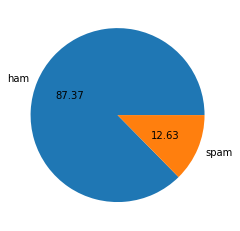

In [13]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
#data is imbalanced

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ss439\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
#length of text
df['no_of_characters']=df['text'].apply(len)
display(df)

,target,text,no_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [16]:
#finding no of words
df['no_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
display(df)

,target,text,no_of_characters,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [17]:
#no of sentences in each text
df['no_of_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
display(df)

,target,text,no_of_characters,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [18]:
df[['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [19]:
#ham messages
df[df['target']==0][['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [20]:
#spam messages
df[df['target']==1][['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


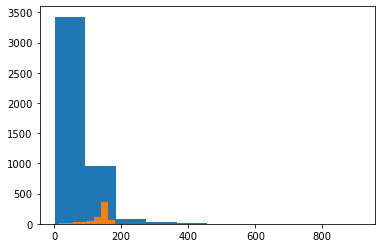

In [21]:
plt.hist(df[df['target']==0]['no_of_characters'])
plt.hist(df[df['target']==1]['no_of_characters'])
plt.show()
#we can clearly observe theat spam messages contain more no of charcters compared to ham

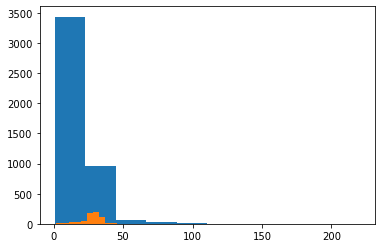

In [22]:
#for words
plt.hist(df[df['target']==0]['no_of_words'])
plt.hist(df[df['target']==1]['no_of_words'])
plt.show()

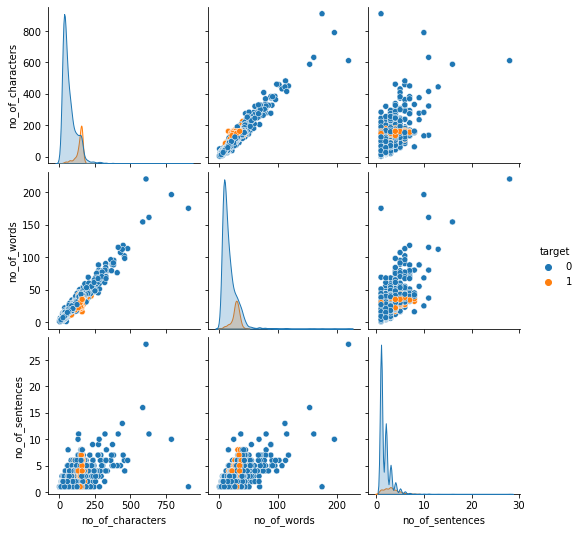

In [23]:
import seaborn as sns
sns.pairplot(df,hue='target')

In [24]:
df.corr()

,target,no_of_characters,no_of_words,no_of_sentences
target,1.000000,0.384717,0.262984,0.284901
no_of_characters,0.384717,1.000000,0.965770,0.638143
no_of_words,0.262984,0.965770,1.000000,0.684541
no_of_sentences,0.284901,0.638143,0.684541,1.000000


#  Data Preprocessing

In [54]:
#lower case
#Tokenanization
#removing special characters
#Removing stop words and pancuation
#stemming and Lemmatization

In [26]:
def text_transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    temp=[]
    for i in text:
        if i.isalnum():
            temp.append(i)
    text=temp[:]
    temp=[]
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)
    text=temp[:]
    temp=[]
    for i in text:
        temp.append(ps.stem(i))
        
    return ' '.join(temp)

In [118]:
text_transform(df['text'][706])

'wan na gym harri'

In [115]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ss439\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [116]:
#stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('bidding')

'bid'

In [34]:
df['transformed_text']=df['text'].apply(text_transform)
display(df)

,target,text,no_of_characters,no_of_words,no_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [36]:
from collections import Counter

In [38]:
all_words=Counter(''.join(df['transformed_text']).split())
sorted_counts=sorted(all_words.items(),key=lambda x:x[1],reverse=True)
sorted_counts

[('u', 816),
 ('call', 473),
 ('2', 424),
 ('go', 385),
 ('get', 360),
 ('ur', 284),
 ('lt', 271),
 ('4', 246),
 ('gt', 242),
 ('come', 209),
 ('like', 207),
 ('free', 194),
 ('time', 192),
 ('got', 191),
 ('know', 190),
 ('text', 187),
 ('want', 181),
 ('love', 176),
 ('day', 163),
 ('good', 157),
 ('need', 154),
 ('send', 152),
 ('txt', 148),
 ('one', 141),
 ('take', 135),
 ('see', 132),
 ('repli', 127),
 ('make', 127),
 ('n', 124),
 ('still', 121),
 ('r', 121),
 ('stop', 119),
 ('mobil', 117),
 ('back', 116),
 ('tell', 115),
 ('new', 113),
 ('phone', 112),
 ('home', 111),
 ('lor', 110),
 ('think', 109),
 ('today', 108),
 ('say', 105),
 ('hope', 105),
 ('ask', 104),
 ('give', 103),
 ('na', 100),
 ('week', 99),
 ('da', 97),
 ('claim', 96),
 ('thing', 95),
 ('miss', 91),
 ('work', 89),
 ('meet', 88),
 ('c', 87),
 ('wait', 87),
 ('dont', 86),
 ('tri', 86),
 ('pleas', 86),
 ('happi', 82),
 ('wan', 82),
 ('much', 80),
 ('friend', 78),
 ('prize', 78),
 ('feel', 78),
 ('number', 78),
 ('nig

C:\Users\ss439\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


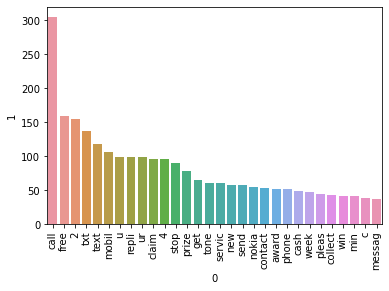

In [45]:
#spam 
spam_words=Counter(''.join(df[df['target']==1]['transformed_text']).split())
spam_sorted_counts=sorted(spam_words.items(),key=lambda x:x[1],reverse=True)
t=spam_sorted_counts[:30]
sns.barplot(pd.DataFrame(t)[0],pd.DataFrame(t)[1])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\ss439\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


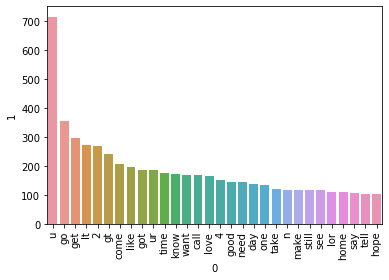

In [46]:
#ham
ham_words=Counter(''.join(df[df['target']==0]['transformed_text']).split())
ham_sorted_counts=sorted(ham_words.items(),key=lambda x:x[1],reverse=True)
t=ham_sorted_counts[:30]
sns.barplot(pd.DataFrame(t)[0],pd.DataFrame(t)[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Bulding 

In [99]:
#naive Bias
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer(max_features=3000)
x=cv.fit_transform(df['transformed_text']).toarray()
print(x,x.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (5169, 3000)


In [100]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [101]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [102]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [103]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb.fit(xtrain,ytrain)
ypred_1=gnb.predict(xtest)
print(accuracy_score(ypred_1,ytest))
print(confusion_matrix(ytest,ypred_1))
print(precision_score(ytest,ypred_1))

0.874274661508704
[[787 109]
 [ 21 117]]
0.5176991150442478


In [104]:
mnb.fit(xtrain,ytrain)
ypred_2=mnb.predict(xtest)
print(accuracy_score(ypred_2,ytest))
print(confusion_matrix(ytest,ypred_2))
print(precision_score(ytest,ypred_2))

0.971953578336557
[[880  16]
 [ 13 125]]
0.8865248226950354


In [105]:
bnb.fit(xtrain,ytrain)
ypred_3=bnb.predict(xtest)
print(accuracy_score(ypred_3,ytest))
print(confusion_matrix(ytest,ypred_3))
print(precision_score(ytest,ypred_3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [106]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)
x=tfidf.fit_transform(df['transformed_text']).toarray()
print(x,x.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (5169, 3000)


In [107]:
gnb.fit(xtrain,ytrain)
ypred_1=gnb.predict(xtest)
print(accuracy_score(ypred_1,ytest))
print(confusion_matrix(ytest,ypred_1))
print(precision_score(ytest,ypred_1))

0.874274661508704
[[787 109]
 [ 21 117]]
0.5176991150442478


In [108]:
mnb.fit(xtrain,ytrain)
ypred_2=mnb.predict(xtest)
print(accuracy_score(ytest,ypred_2))
print(confusion_matrix(ytest,ypred_2))
print(precision_score(ytest,ypred_2))

0.971953578336557
[[880  16]
 [ 13 125]]
0.8865248226950354


In [109]:
bnb.fit(xtrain,ytrain)#Best Fitting
ypred_3=bnb.predict(xtest)
print(accuracy_score(ypred_3,ytest))
print(confusion_matrix(ytest,ypred_3))
print(precision_score(ytest,ypred_3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [114]:
msg=input()
transformed_sms=text_transform(msg)
vector_input=tfidf.transform([transformed_sms])
result=bnb.predict(vector_input)
if result==1:
    print("The message is a spam message.")
else:
    print("The message is not spam.")

I don't know how I can say thank you to a friend who understands the all the things I never say and never says anything I don't understand
The message is not spam.
